## Inertial oscillation and wind direction

### Introduction
This notebook aims to visualize inertial oscillations as well as wind fluctuations.

### Data Sources
- Drifter Data:
  - Source: NOAA
  - Collection Frequency: Every 6 hours
  - Total Number of Drifters: 221
- Wind Data:
  - Source: Copernicus Marine
  - Collection Frequency: Every 12 hours
  - Data Product: SEALEVEL_GLO_PHY_L4_MY_008_047

## Import Library


In [19]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from cartopy import config
import matplotlib.animation

## Read Drifter Data


In [20]:
fn='./drifter_6hour_qc_893c_d15d_c4b7_U1711967648742.nc';
ds=xr.open_dataset(fn);

## Extract Coordinates and Variables


In [21]:
ve_curr = ds.ve.values
vn_curr = ds.vn.values
sst = ds.sst.values
lon = ds.longitude.values
lat = ds.latitude.values
time = ds.time.values

## Creation of Pandas Array for Drifter Data


In [22]:
data = {
    'longitude': lon,
    'latitude' : lat,
    'time'     : time,
    've'       : ve_curr,
    'vn'       : vn_curr,
    'sst'      : sst
}

df = pd.DataFrame(data)
df

,longitude,latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
78378,-22.006,-19.946,2023-06-11 12:00:00,-0.03853,-0.05076,25.189
78379,-22.013,-19.961,2023-06-11 18:00:00,-0.05150,-0.06262,25.179
78380,-22.027,-19.971,2023-06-12 00:00:00,-0.06030,-0.04773,25.133
78381,-22.038,-19.980,2023-06-12 06:00:00,-0.06036,-0.05688,25.093


## Selecting Drifter Data


In [23]:
# Test: Our selected drifter has 258 observations.  

df_1 = df[0:225]
df_1

,longitude,latitude,time,ve,vn,sst
0,-14.478,-18.548,2023-01-01 00:00:00,-0.13760,-0.07635,23.612
1,-14.499,-18.556,2023-01-01 06:00:00,-0.09969,0.01322,23.564
2,-14.519,-18.543,2023-01-01 12:00:00,-0.15719,0.08193,23.699
3,-14.563,-18.524,2023-01-01 18:00:00,-0.26155,0.03533,23.856
4,-14.626,-18.529,2023-01-02 00:00:00,-0.23922,-0.07837,23.717
...,...,...,...,...,...,...
220,-19.017,-18.538,2023-02-25 00:00:00,-0.11525,0.01892,26.213
221,-19.044,-18.540,2023-02-25 06:00:00,-0.13520,-0.02962,26.126
222,-19.073,-18.550,2023-02-25 12:00:00,-0.06850,-0.06000,26.365
223,-19.072,-18.564,2023-02-25 18:00:00,-0.04099,-0.01710,26.603


## Visualisation of Inertial oscillation and wind direction


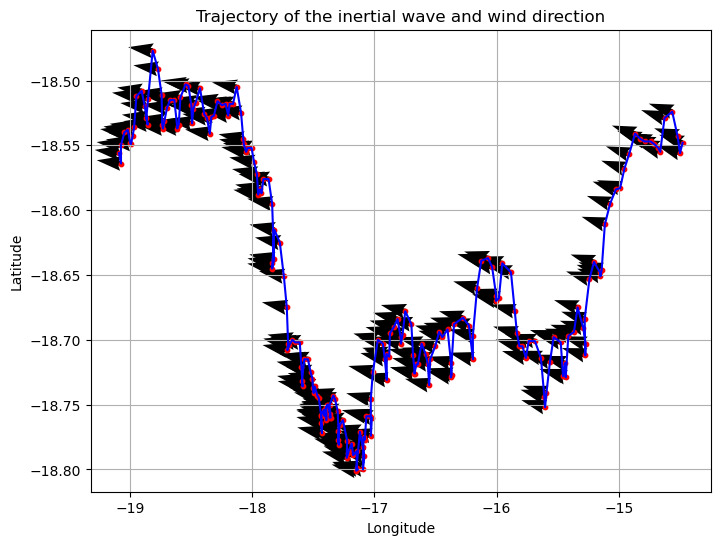

In [26]:
# Chargement des données des bouées dérivantes à partir du DataFrame
df_bouees = df[0:225]   
# Supposez que votre DataFrame contient des colonnes 'temps', 'latitude' et 'longitude' 

# Chargement des données satellitaires à partir du fichier netCDF
ds_satellitaires = xr.open_dataset('cmems_obs-wind_glo_phy_my_l4_P1M_1715561830429.nc')   
# Supposez que vos données satellitaires de vent sont stockées dans une variable appelée 'u_mean' et 'v_mean'

# Extraction des données de vent satellitaires pour les mêmes positions spatiales et temporelles que les bouées
latitudes = df_bouees['latitude']
longitudes = df_bouees['longitude']
temps = df_bouees['time']

satellitaires_vent_u = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_satellitaires['eastward_wind'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_vent_u.append(courant)

satellitaires_vent_v = []
for i in range(len(df_bouees)):
    lat = latitudes[i]
    lon = longitudes[i]
    time = temps[i]
    courant = ds_satellitaires['northward_wind'].interp(latitude=lat, longitude=lon, time=time).values
    satellitaires_vent_v.append(courant)

# Display quivers with mean values
plt.figure(figsize=(8, 6))
plt.quiver(df_bouees['longitude'], df_bouees['latitude'], satellitaires_vent_u, satellitaires_vent_v, scale=(150), width=0.02)
plt.scatter( df_bouees['longitude'],  df_bouees['latitude'], color='red', s=10)
 
# Plot the line connecting trajectory points
plt.plot(df_bouees['longitude'], df_bouees['latitude'], color='blue', linestyle='-')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Trajectory of the inertial wave and wind direction')
# plt.colorbar(label='Inertial wave')
plt.savefig("fig21 mode.png")
plt.grid(True)
plt.show()

## Conclusion

 - We can note that the winds are from the East in our figure and that the inertial waves of $v_e$ and $v_n$ propagate perpendicularly in this direction.
 - Indeed, according to the article by Shengli Chen et al. on local inertial oscillations in the surface ocean generated by time-varying winds, these oscillations are generally generated by the wind. According to our results, these winds are known as the Trade Winds or the Easterlies. (see: https://www.researchgate.net/publication/283309082_Local_inertial_oscillations_in_the_surface_ocean_generated_by_time-varying_winds).